In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ad = pd.read_csv('advertising.csv')
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

Here we want to see the predictors which make the more contribution to Clicked on Ad. Clicked on Ad is a dependent variable while the other columns are the predictors

In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# Data Exploration

Now let's explore the predictors from the data. I will start with the numerical variables first and see their distribution

In [28]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

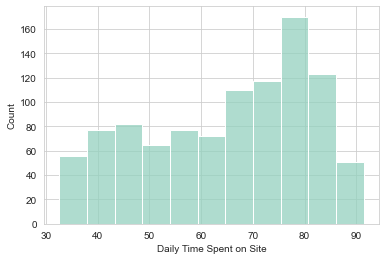

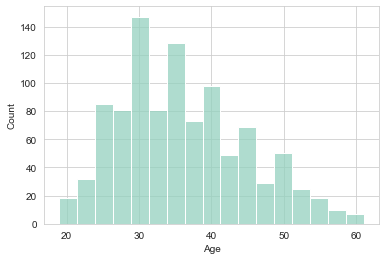

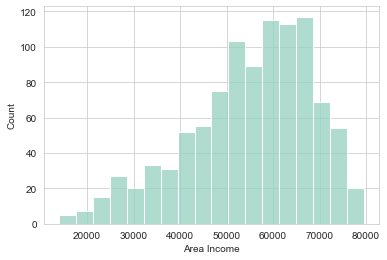

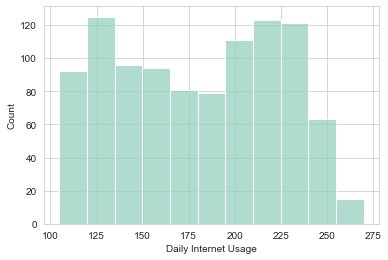

In [29]:
v1 = ['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage']

for index, value in enumerate(ad[v1]):
    plt.figure(index)
    sns.histplot(x=value, data=ad)

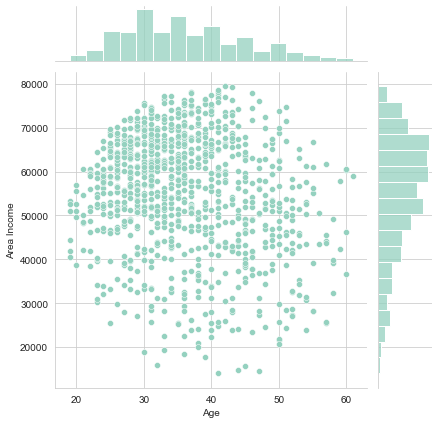

In [37]:
# Jointplot
sns.jointplot(x='Age', y='Area Income', data=ad)

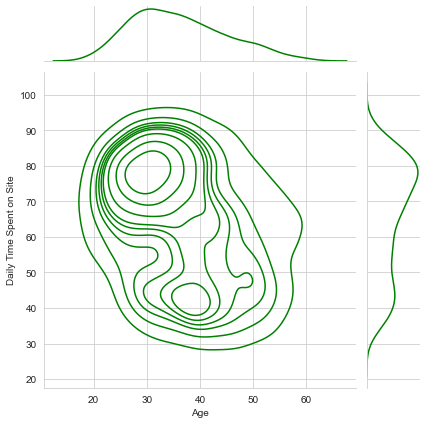

In [43]:
# Jointplot 
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad, kind='kde', color='green')

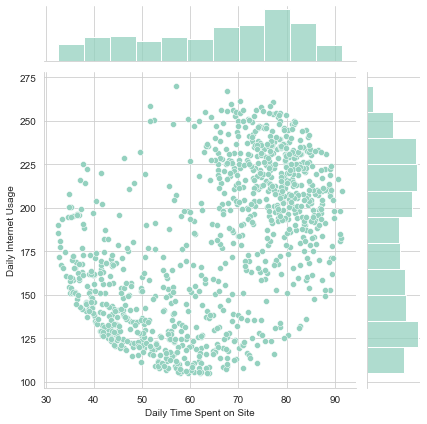

In [45]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage', data = ad)

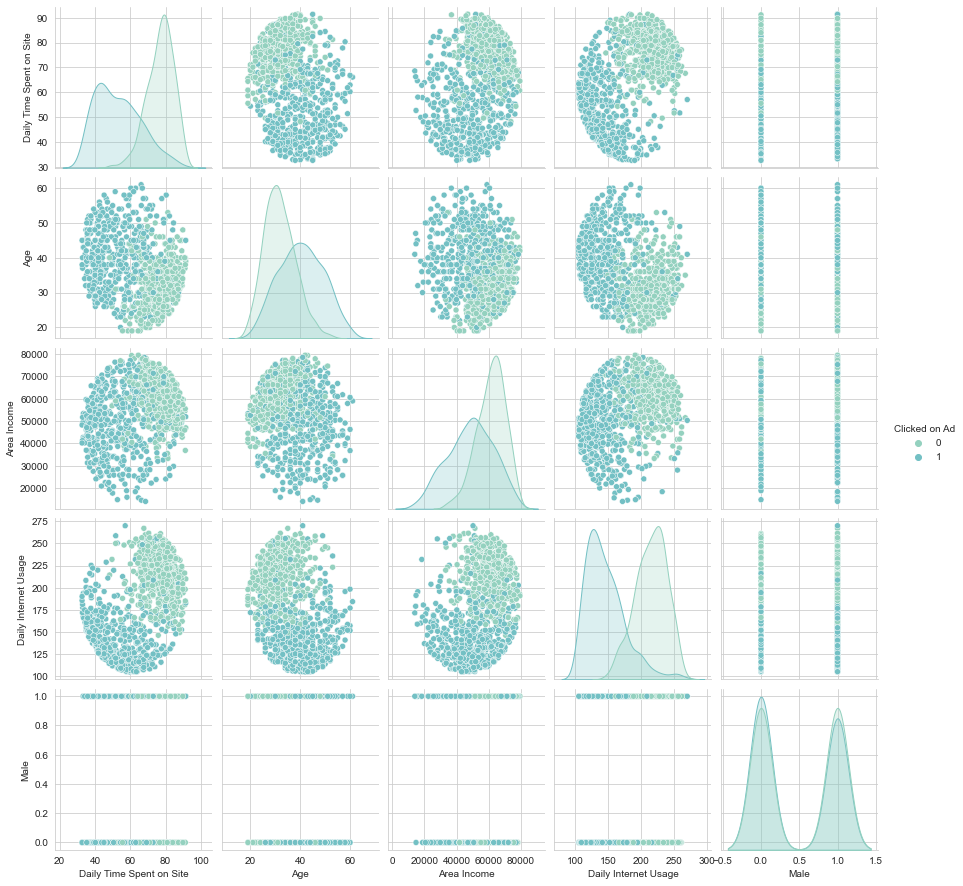

In [47]:
sns.pairplot(ad, hue='Clicked on Ad')

# Logistic Regression

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
X = ad[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad['Clicked on Ad']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 110)

In [60]:
# Create an object and fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Predict 
predictions = logmodel.predict(X_test)

In [64]:
print(classification_report(y_test, predictions))
print("----------------------------------------------")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       167
           1       0.90      0.95      0.93       133

    accuracy                           0.93       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.93      0.93      0.93       300

----------------------------------------------
[[153  14]
 [  6 127]]


In [84]:
# Coefficients
pd.DataFrame(logmodel.coef_.transpose(), X_train.columns, columns = ['Coefficients'])

,Coefficients
Daily Time Spent on Site,-0.061907
Age,0.265542
Area Income,-0.000023
Daily Internet Usage,-0.021001
Male,0.001225
